# SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:

#1. Importing Dataset
# Reading the dataset
df = pd.read_csv('Advertising.csv')

In [4]:
# Preview of dataset
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
183,184,287.6,43.0,71.8,26.2
180,181,156.6,2.6,8.3,10.5
84,85,213.5,43.0,33.8,21.7
45,46,175.1,22.5,31.5,14.9
154,155,187.8,21.1,9.5,15.6


In [5]:
# finding the shape of dataset
df.shape

(200, 5)

In [6]:
# delete a column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#2. EDA and Data Preprocessing

In [8]:
# Let's get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Now we draw the following conclusion about our dataset
      *  Our dataset contain total 4 columns and 200 rows
      *  Dataset contains only numerical data 
      *  Dataset has no missing values


In [10]:
#Now working with numerical features

In [11]:
# Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


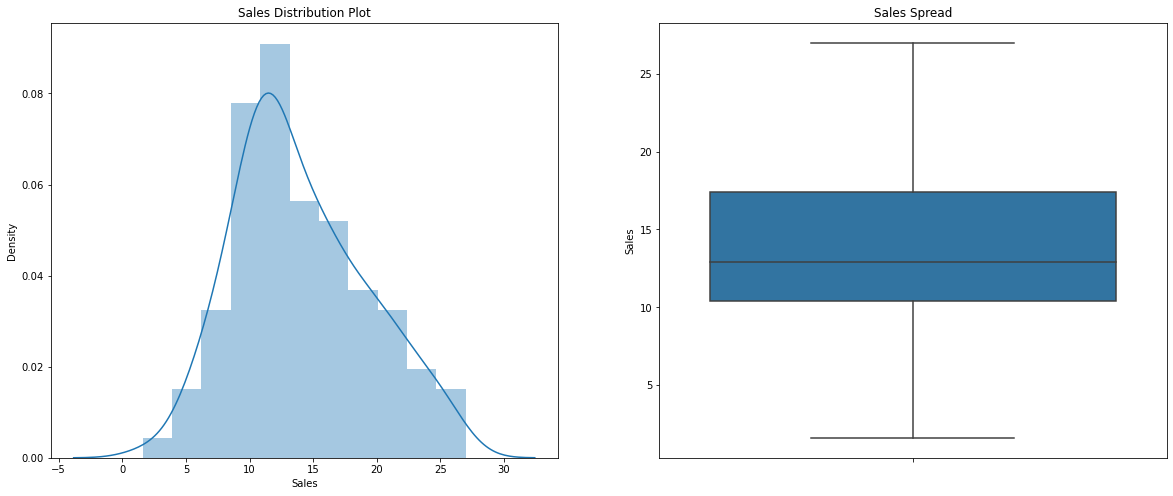

In [12]:
# Let's get some information about the target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sales Distribution Plot')
sns.distplot(df['Sales'])

plt.subplot(1,2,2)
plt.title('Sales Spread')
sns.boxplot(y=df['Sales'])

plt.show()

Conclusion:
  1)Plot seemed to be normal-distributed.

  2)No outlier is present in Sales column

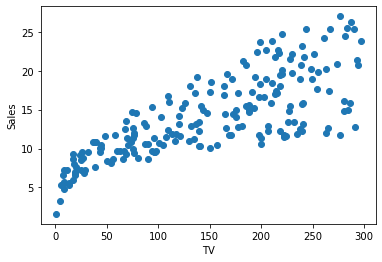

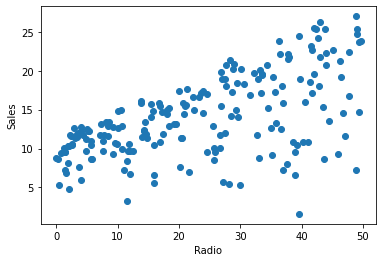

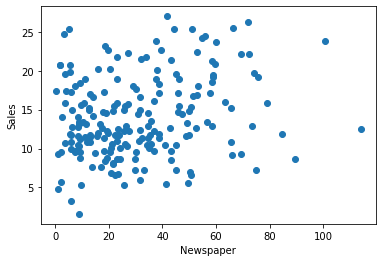

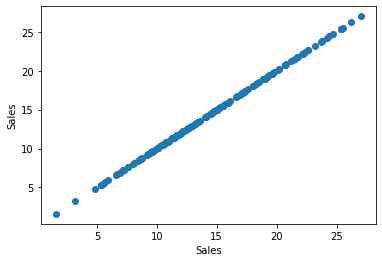

In [13]:
# Now let's find the relationship between independent and dependent features

for feature in df.columns:
    plt.scatter(y=df['Sales'],x=df[feature])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

## Now let's find the relationship between each feature with other

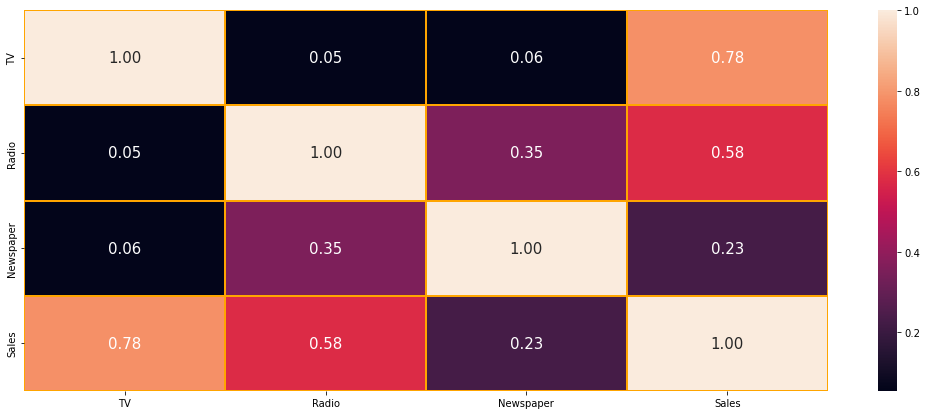

In [14]:
# heatmap of the data for checking the correlation between each feature

plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', annot_kws={'size':15}, linewidths=2, linecolor='orange')
plt.show()

Conclusion:
TV and Radio have positive correlation with sales of 78% and 58%

Newspaper have positive correlation with sales of 23%

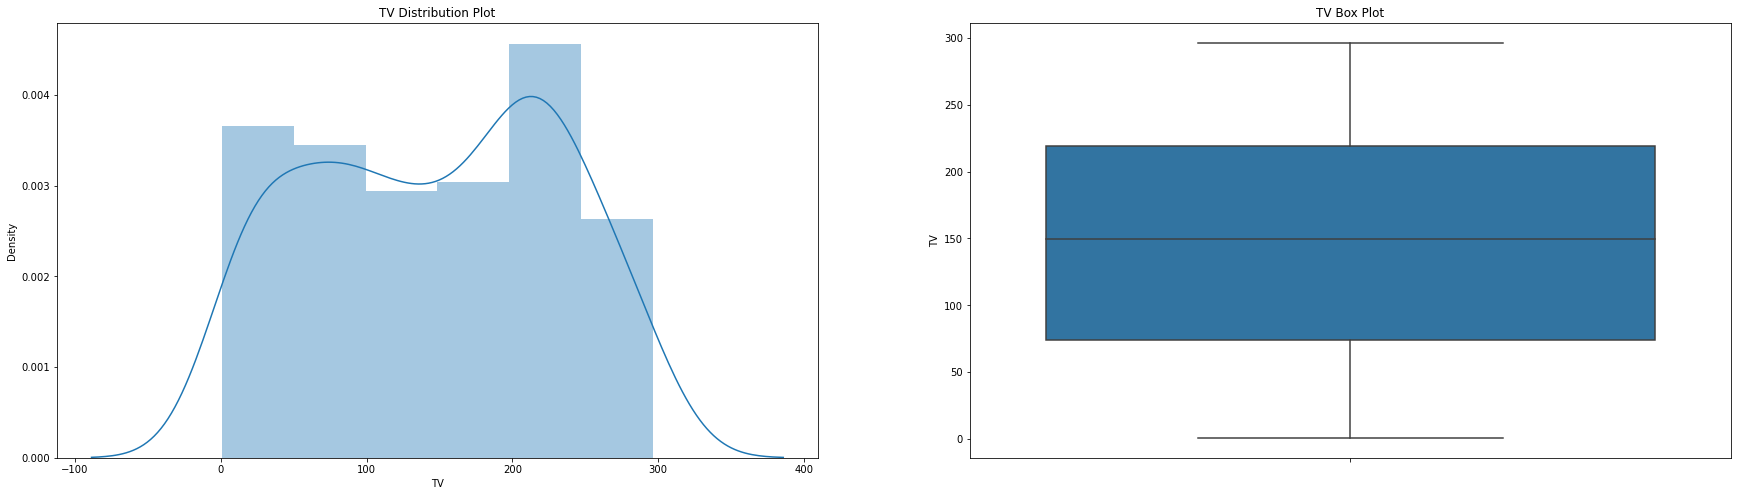

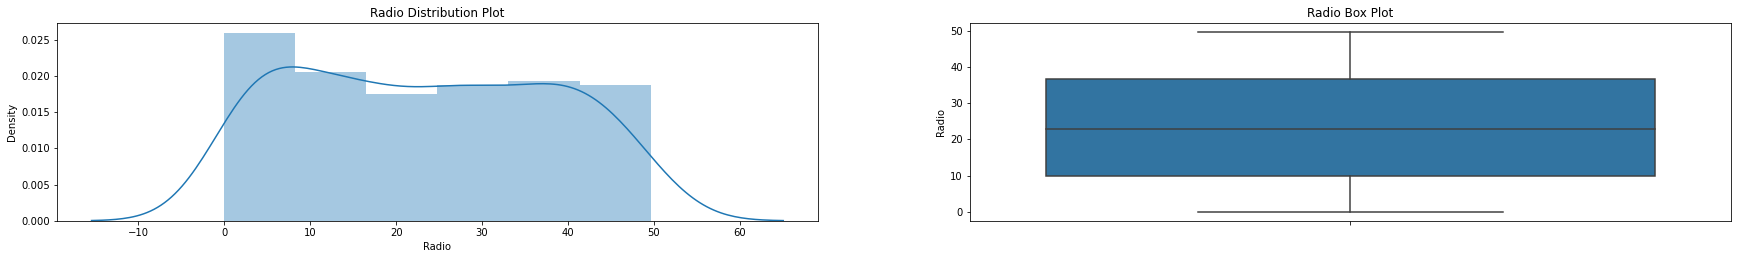

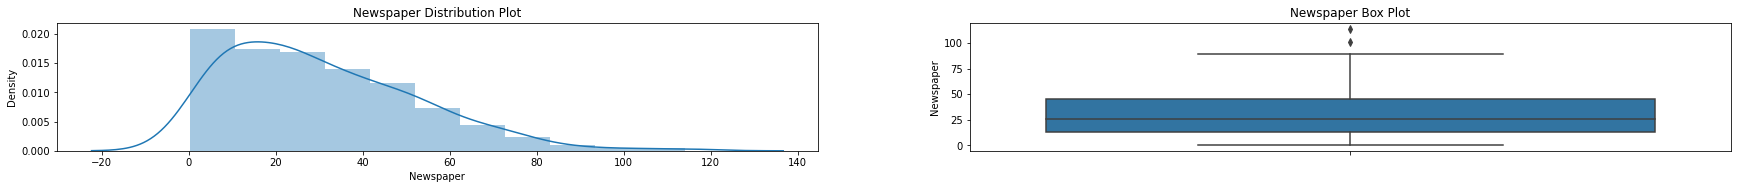

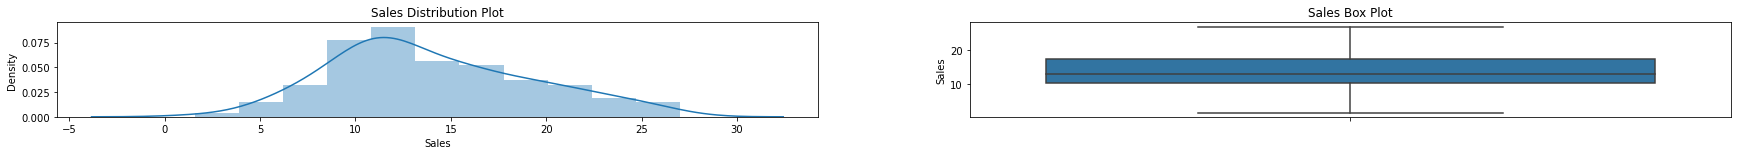

In [15]:
# Let's find the distribution of each of these numerical features and also check for outliers

index = 1
for feature in df.columns:
    plt.figure(figsize=(30,8))
    
    #first plot
    plt.subplot(index,2,1)
    plt.title(feature+" Distribution Plot")
    sns.distplot(df[feature])
    
    # second plot
    plt.subplot(index,2,2)
    plt.title(feature+" Box Plot")
    sns.boxplot(y=df[feature])
    
    index+=1
    plt.show()

Multivariate Analysis

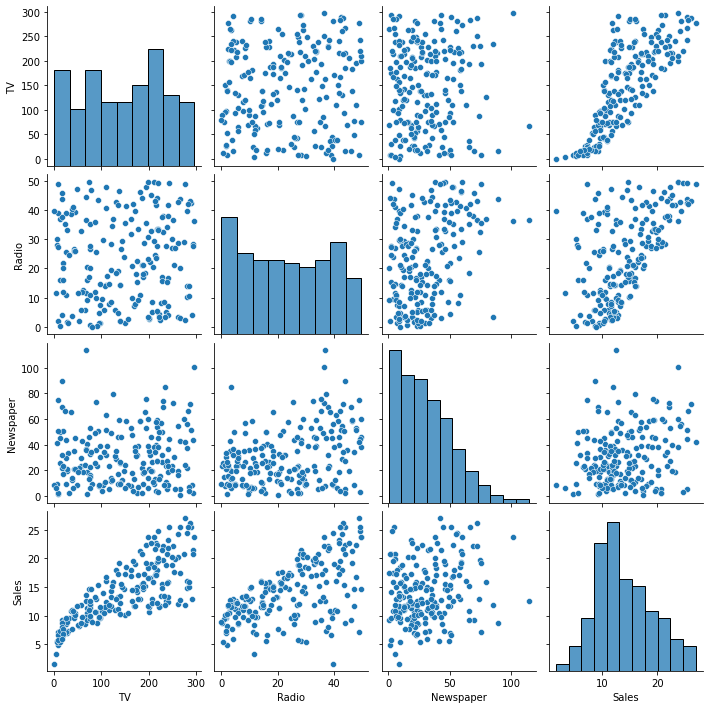

In [16]:
sns.pairplot(df)
plt.show()

Splitting data into training and testing set

In [18]:
X = df.drop(columns=['Sales'],axis=1)
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [20]:
print('Training data shape of x and y respectively: ',x_train.shape,y_train.shape)
print('Testing data shape of x and y respectively: ',x_test.shape,y_test.shape)

Training data shape of x and y respectively:  (160, 3) (160,)
Testing data shape of x and y respectively:  (40, 3) (40,)


Model Building

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr_model.predict(x_test)

Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_pred,y_test)
r2_score = r2_score(y_pred,y_test)

In [24]:
lr_model.score(x_test,y_test)

0.8994380241009121